# Countries' Diets and Covid Cases

In [1]:
#import dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import textwrap

In [2]:
#load files
#This file was downloaded from Kagle
food_supply_to_load = "COVID_Diet_Data/Food_Supply_Quantity_kg_Data.csv"

#Read file and store as dataframe and display orginal df
food_supply = pd.read_csv(food_supply_to_load)
food_supply.head()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%


# The Section is the code to clean up the data we will be analyzing

In [3]:
#Count how many counties in the data and store in a variable
country_count = len(food_supply["Country"].unique())
country_count

170

In [4]:
#Top 2 countries with the most deaths
most_deaths = food_supply.sort_values("Deaths", ascending=False)
most_deaths.head(2)

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
14,Belgium,5.3730,0.8559,17.7279,0.0010,6.6704,0.6487,1.1325,4.1623,3.237,...,6.8161,32.2637,24.5,<2.5,6.286322,0.185428,0.000000,6.100894,11515000.0,%
138,Slovenia,4.9933,1.1248,18.9196,0.0005,7.6345,0.5376,0.6515,6.4367,4.161,...,5.0020,31.0774,22.5,<2.5,8.235901,0.171755,7.312934,0.751213,2103000.0,%


In [58]:
#Top 2 countries with the least deaths
least_deaths = food_supply[food_supply["Deaths"] != 0].sort_values("Deaths", ascending=True)
least_deaths.head(2)

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
160,United Republic of Tanzania,4.5185,0.0403,4.8022,0.0000,10.4453,0.0300,0.5828,6.8147,0.7902,...,3.9520,45.1973,7.1,30.7,0.000852,0.000035,0.000306,0.000511,59734000.0,%
166,Vietnam,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,...,11.9508,41.4232,2.1,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0,%


In [6]:
#Top 2 countries with the most confirmed
most_confirmed = food_supply.sort_values("Confirmed", ascending=False)
most_confirmed.head(2)

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
102,Montenegro,2.2188,0.2067,22.8328,0.0014,5.0447,0.5542,0.6472,5.7297,3.3604,...,5.0001,27.1612,24.9,<2.5,10.408199,0.134405,9.039871,1.233923,622000.0,%
38,Czechia,9.8498,0.8945,17.8065,0.0006,5.6937,0.4964,0.5355,3.3962,4.7618,...,4.5289,32.1944,28.5,<2.5,9.612841,0.159845,8.555328,0.897667,10716000.0,%


In [7]:
#Top 2 countries with the least confirmed
least_confirmed = food_supply.sort_values("Confirmed", ascending=True)
least_confirmed.head(2)

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
164,Vanuatu,0.2424,0.0793,6.6244,0.0000,6.4102,0.1875,2.1649,5.8103,2.7466,...,3.9175,43.3737,23.5,7.2,0.000312,0.0,0.000312,0.000000,321000.0,%
85,Lao People's Democratic Republic,0.7883,0.0979,3.6579,0.0006,16.3943,0.1063,1.4213,8.8158,1.7111,...,11.6410,46.3416,4.5,16.5,0.000621,0.0,0.000566,0.000055,7242000.0,%


In [8]:
#We are creating a new dataframe that will combine different columns that are similar and print it out
categories = food_supply.copy()
categories.head()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%


In [9]:
#We will combine these columns into new columns and printing it out to make sure it worked
categories["Sugars"] = categories["Sugar & Sweeteners"] + categories["Sugar Crops"]
categories["Aquatic Seafood"] = categories["Aquatic Products, Other"] + categories["Fish, Seafood"]
categories["Meats & Animal Products"] = categories["Meat"] + categories["Offals"] + categories["Eggs"] + categories["Animal Products"]
categories["Vegetables"] = categories["Vegetables"] + categories["Starchy Roots"]
categories["Other"] = categories["Miscellaneous"] + categories["Oilcrops"] + categories["Pulses"] + categories["Spices"] + categories["Treenuts"] 
categories.head()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population),Sugars,Aquatic Seafood,Meats & Animal Products,Other
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,...,0.142134,0.006186,0.123374,0.012574,38928000.0,%,1.3489,0.0350,11.0517,0.5725
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,...,2.967301,0.050951,1.792636,1.123714,2838000.0,%,1.5367,0.2126,21.4668,1.4403
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,...,0.244897,0.006558,0.167572,0.070767,44357000.0,%,1.8342,0.2416,11.3786,1.1656
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,...,0.061687,0.001461,0.056808,0.003419,32522000.0,%,1.8495,1.7707,7.1986,1.1928
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,...,0.293878,0.007143,0.190816,0.095918,98000.0,%,3.8749,4.1489,22.7994,1.2928


In [10]:
#This section drops the columns we have now used in a combined column and print out updated dataframe
categories = categories.drop(columns=["Animal Products", "Aquatic Products, Other", "Eggs", "Offals", "Meat", "Starchy Roots", "Sugar Crops", "Sugar & Sweeteners", "Fish, Seafood" ])
categories = categories.drop(columns=["Miscellaneous", "Oilcrops", "Pulses", "Spices", "Treenuts", "Unit (all except Population)"])

categories.head()

,Country,Alcoholic Beverages,Animal fats,Cereals - Excluding Beer,Fruits - Excluding Wine,Milk - Excluding Butter,Stimulants,Vegetable Oils,Vegetables,Vegetal Products,...,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Sugars,Aquatic Seafood,Meats & Animal Products,Other
0,Afghanistan,0.0014,0.1973,24.8097,5.3495,7.5828,0.3078,0.5345,7.6444,40.5645,...,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,1.3489,0.0350,11.0517,0.5725
1,Albania,1.6719,0.1357,5.7817,6.7861,15.7213,0.1055,0.3261,13.5849,31.2304,...,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,1.5367,0.2126,21.4668,1.4403
2,Algeria,0.2711,0.0282,13.6816,6.3801,7.6189,0.2216,1.0310,15.7824,40.3651,...,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,1.8342,0.2416,11.3786,1.1656
3,Angola,5.8087,0.0560,9.1085,6.0005,0.8311,0.0508,0.6463,20.4143,45.0722,...,25,0.061687,0.001461,0.056808,0.003419,32522000.0,1.8495,1.7707,7.1986,1.1928
4,Antigua and Barbuda,3.5764,0.0087,5.9960,10.7451,6.3663,0.1564,0.8102,6.9017,33.3233,...,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,3.8749,4.1489,22.7994,1.2928


In [11]:
#Finish Renaming the columns to add percentages
categories.rename(columns = {'Fruits - Excluding Wine': 'Fruits', 'Milk - Excluding Butter': 'Milk', 'Confirmed': 'Confirmed Cases'},inplace = True)
categories

,Country,Alcoholic Beverages,Animal fats,Cereals - Excluding Beer,Fruits,Milk,Stimulants,Vegetable Oils,Vegetables,Vegetal Products,...,Undernourished,Confirmed Cases,Deaths,Recovered,Active,Population,Sugars,Aquatic Seafood,Meats & Animal Products,Other
0,Afghanistan,0.0014,0.1973,24.8097,5.3495,7.5828,0.3078,0.5345,7.6444,40.5645,...,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,1.3489,0.0350,11.0517,0.5725
1,Albania,1.6719,0.1357,5.7817,6.7861,15.7213,0.1055,0.3261,13.5849,31.2304,...,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,1.5367,0.2126,21.4668,1.4403
2,Algeria,0.2711,0.0282,13.6816,6.3801,7.6189,0.2216,1.0310,15.7824,40.3651,...,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,1.8342,0.2416,11.3786,1.1656
3,Angola,5.8087,0.0560,9.1085,6.0005,0.8311,0.0508,0.6463,20.4143,45.0722,...,25,0.061687,0.001461,0.056808,0.003419,32522000.0,1.8495,1.7707,7.1986,1.1928
4,Antigua and Barbuda,3.5764,0.0087,5.9960,10.7451,6.3663,0.1564,0.8102,6.9017,33.3233,...,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,3.8749,4.1489,22.7994,1.2928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),2.5952,0.0403,12.9253,7.6460,9.3920,0.1479,1.3734,6.7117,35.2416,...,21.2,0.452585,0.004287,0.424399,0.023899,28645000.0,3.4106,0.9456,19.1360,0.4343
166,Vietnam,1.4591,0.1640,16.8740,5.9029,0.6069,0.2880,0.2201,13.0104,41.4232,...,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0,2.0996,2.6434,13.7373,1.5712
167,Yemen,0.0364,0.0446,27.2077,5.1344,1.8911,0.2199,1.0811,4.2929,44.2126,...,38.9,0.007131,0.002062,0.004788,0.000282,29826000.0,5.0468,0.5240,9.1151,1.1935
168,Zambia,5.7360,0.0829,21.1938,1.0183,1.7570,0.0618,0.6657,11.4298,43.9789,...,46.7,0.334133,0.004564,0.290524,0.039045,18384000.0,1.5632,1.6924,8.5071,2.3133


In [12]:
#Reset index and display new clean dataframe we will use the rest of the way
categories_clean = categories.dropna().reset_index(drop=True)
categories_clean.head()

,Country,Alcoholic Beverages,Animal fats,Cereals - Excluding Beer,Fruits,Milk,Stimulants,Vegetable Oils,Vegetables,Vegetal Products,...,Undernourished,Confirmed Cases,Deaths,Recovered,Active,Population,Sugars,Aquatic Seafood,Meats & Animal Products,Other
0,Afghanistan,0.0014,0.1973,24.8097,5.3495,7.5828,0.3078,0.5345,7.6444,40.5645,...,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,1.3489,0.0350,11.0517,0.5725
1,Albania,1.6719,0.1357,5.7817,6.7861,15.7213,0.1055,0.3261,13.5849,31.2304,...,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,1.5367,0.2126,21.4668,1.4403
2,Algeria,0.2711,0.0282,13.6816,6.3801,7.6189,0.2216,1.0310,15.7824,40.3651,...,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,1.8342,0.2416,11.3786,1.1656
3,Angola,5.8087,0.0560,9.1085,6.0005,0.8311,0.0508,0.6463,20.4143,45.0722,...,25,0.061687,0.001461,0.056808,0.003419,32522000.0,1.8495,1.7707,7.1986,1.1928
4,Argentina,4.2672,0.2234,8.4102,6.0435,10.2328,0.4378,0.9541,7.3923,30.6559,...,4.6,4.356147,0.108227,3.905192,0.342729,45377000.0,3.0536,0.4693,27.7633,0.0966


In [13]:
for col in categories_clean.columns:
    print(col)

Country
Alcoholic Beverages
Animal fats
Cereals - Excluding Beer
Fruits
Milk
Stimulants
Vegetable Oils
Vegetables
Vegetal Products
Obesity
Undernourished
Confirmed Cases
Deaths
Recovered
Active
Population
Sugars
Aquatic Seafood
Meats & Animal Products
Other


# The Section Is for Scatter Plot

In [14]:
def scatter_plot(x, y):
    
    #linear regression
    pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(x, y)
    pe_fit = pe_slope * x + pe_int
    
    
    # Create a scatter plot
    plt.scatter(x, y, marker="o", facecolors="plum", edgecolors="indigo")
    
    # Add linear model
    plt.plot(x, pe_fit, linewidth=1.5, color="tomato")
    
    # Add labels and title
    plt.title(f'{x.name} vs. {y.name}', size="14", weight="bold")
    plt.xlabel(f'{x.name} %', size="12")
    plt.ylabel(f'{y.name} %', size="12")

The correlation between Deaths and diet composition of Obesity is 0.49.


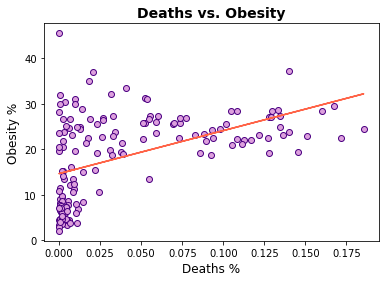

In [15]:
#Creating a Scatter plot for comparing Covid Deaths and Countries' Obesity % 
x = categories_clean["Deaths"]
y = categories_clean["Obesity"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)

# Save the figure
plt.savefig("Saved Graphs\Scat_Dea_Vs_Obesity.png")
plt.show()

The correlation between Confirmed Cases and diet composition of Obesity is 0.53.


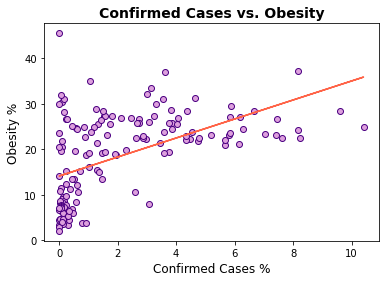

In [16]:
#Creating a Scatter plot for comparing Covid Confirmed Cases and Countries' Obesity % 
x = categories_clean["Confirmed Cases"]
y = categories_clean["Obesity"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)

# Save the figure
plt.savefig("Saved Graphs\Scat_Cases_Vs_Obesity.png")
plt.show()

The correlation between Deaths and diet composition of Milk is 0.54.


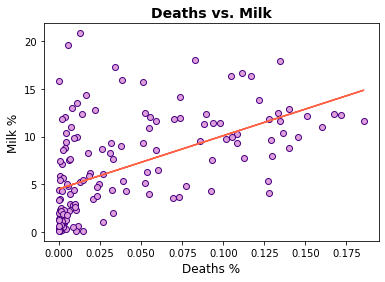

In [17]:
#Creating a Scatter plot for comparing Covid Deaths and Countries Milk % Consumption
x = categories_clean["Deaths"]
y = categories_clean["Milk"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)

# Save the figure
plt.savefig("Saved Graphs\Scat_Dea_Vs_Mil.png")
plt.show()

The correlation between Confirmed Cases and diet composition of Milk is 0.58.


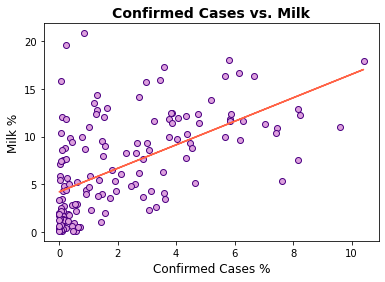

In [18]:
#Creating a Scatter plot for comparing Covid Confirmed Cases and Countries Milk % Consumption
x = categories_clean["Confirmed Cases"]
y = categories_clean["Milk"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)

# Save the figure
plt.savefig("Saved Graphs\Scat_Con_Vs_Mil.png")
plt.show()

The correlation between Deaths and diet composition of Alcoholic Beverages is 0.42.


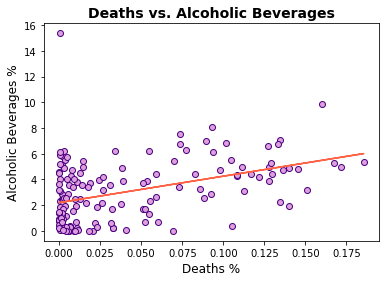

In [19]:
#Creating a Scatter plot for comparing Covid Deaths and Countries' Alcoholic Beverages % Consumption
x = categories_clean["Deaths"]
y = categories_clean["Alcoholic Beverages"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)

# Save the figure
plt.savefig("Saved Graphs\Scat_Dea_Vs_Alc.png")
plt.show()

The correlation between Confirmed Cases and diet composition of Alcoholic Beverages is 0.37.


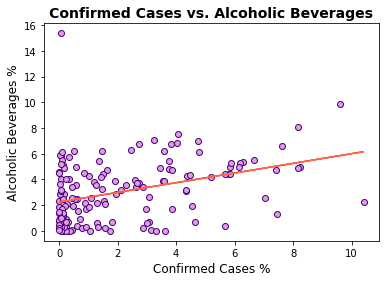

In [20]:
#Creating a Scatter plot for comparing Covid Confirmed Cases and Countries' Alcoholic Beverages % Consumption
x = categories_clean["Confirmed Cases"]
y = categories_clean["Alcoholic Beverages"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)

# Save the figure
plt.savefig("Saved Graphs\Scat_Con_Vs_Alc.png")
plt.show()

The correlation between Deaths and diet composition of Vegetal Products is -0.55.


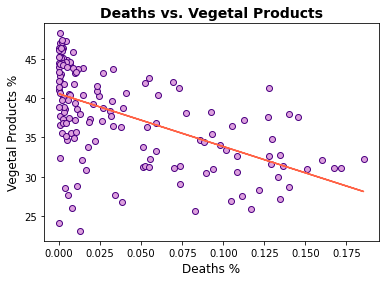

In [21]:
#Creating a Scatter plot for comparing Covid Deaths and Countries' Vegetal Products % Consumption
x = categories_clean["Deaths"]
y = categories_clean["Vegetal Products"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)

# Save the figure
plt.savefig("Saved Graphs\Scat_Dea_Vs_Veg_Pro.png")
plt.show()

The correlation between Confirmed Cases and diet composition of Vegetal Products is -0.6.


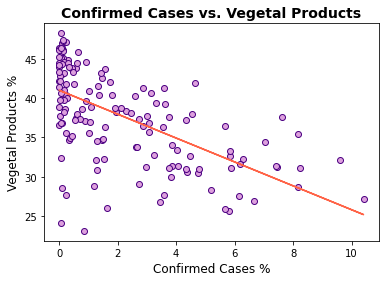

In [22]:
#Creating a Scatter plot for comparing Covid Confirmed Cases and Countries' Vegetal Products % Consumption
x = categories_clean["Confirmed Cases"]
y = categories_clean["Vegetal Products"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)

# Save the figure
plt.savefig("Saved Graphs\Scat_Con_Vs_Veg_Pro.png")
plt.show()

The correlation between Deaths and diet composition of Animal fats is 0.49.


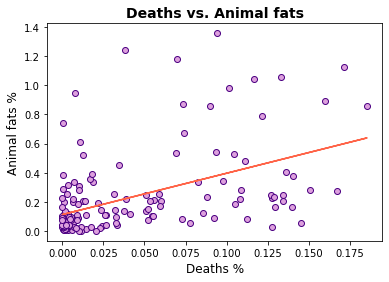

In [23]:
#Creating a Scatter plot for comparing Covid Deaths and Countries' Animal fats % Consumption
x = categories_clean["Deaths"]
y = categories_clean["Animal fats"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)

# Save the figure
plt.savefig("Saved Graphs\Scat_Dea_Vs_Ani_fat.png")
plt.show()

The correlation between Confirmed Cases and diet composition of Animal fats is 0.49.


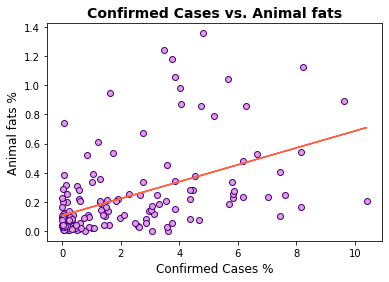

In [24]:
#Creating a Scatter plot for comparing Covid Confirmed Cases and Countries' Animal fats % Consumption
x = categories_clean["Confirmed Cases"]
y = categories_clean["Animal fats"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)

# Save the figure
plt.savefig("Saved Graphs\Scat_Con_Vs_Ani_fat.png")
plt.show()

The correlation between Deaths and diet composition of Cereals - Excluding Beer is -0.42.


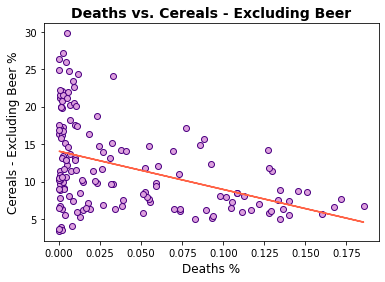

In [25]:
#Creating a Scatter plot for comparing Covid Deaths and Countries' Cereals - Excluding Beer % Consumption
x = categories_clean["Deaths"]
y = categories_clean["Cereals - Excluding Beer"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)

# Save the figure
plt.savefig("Saved Graphs\Scat_Dea_Vs_Cer.png")
plt.show()

The correlation between Confirmed Cases and diet composition of Cereals - Excluding Beer is -0.47.


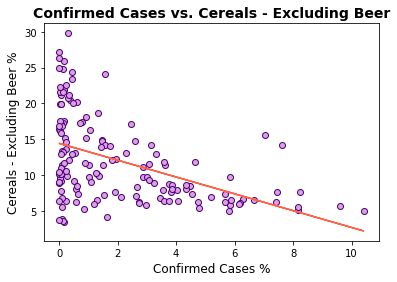

In [26]:
#Creating a Scatter plot for comparing Covid Confirmed Cases and Countries' Cereals - Excluding Beer % Consumption
x = categories_clean["Confirmed Cases"]
y = categories_clean["Cereals - Excluding Beer"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)

# Save the figure
plt.savefig("Saved Graphs\Scat_Con_Vs_Cer.png")
plt.show()

The correlation between Deaths and diet composition of Meats & Animal Products is 0.54.


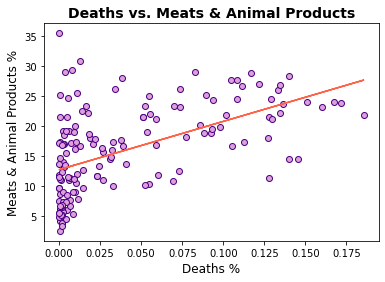

In [27]:
#Creating a Scatter plot for comparing Covid Deaths and Countries' 	Meats & Animal Products % Consumption
x = categories_clean["Deaths"]
y = categories_clean["Meats & Animal Products"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)

# Save the figure
plt.savefig("Saved Graphs\Scat_Dea_Vs_Meats-Animal-Products.png")
plt.show()

The correlation between Confirmed Cases and diet composition of Meats & Animal Products is 0.59.


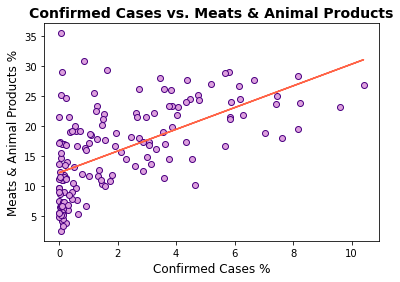

In [28]:
#Creating a Scatter plot for comparing Covid Confirmed Cases and Countries' 	Meats & Animal Products % Consumption
x = categories_clean["Confirmed Cases"]
y = categories_clean["Meats & Animal Products"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)

# Save the figure
plt.savefig("Saved Graphs\Scat_Con_Vs_Meats-Animal-Products.png")
plt.show()

The correlation between Deaths and diet composition of Fruits is -0.03.


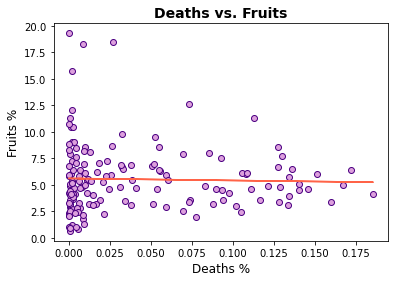

In [29]:
#Creating a Scatter plot for comparing Covid Deaths and Countries' 	Fruits % Consumption
x = categories_clean["Deaths"]
y = categories_clean["Fruits"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)

# Save the figure
plt.savefig("Saved Graphs\Scat_Dea_Vs_Fruits.png")
plt.show()

The correlation between Confirmed Cases and diet composition of Fruits is -0.04.


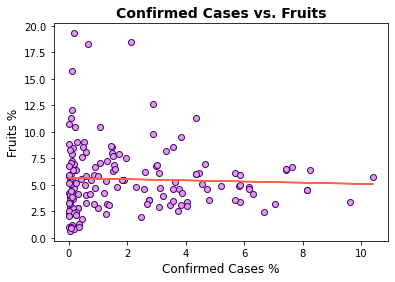

In [30]:
#Creating a Scatter plot for comparing Covid Confirmed Cases and Countries' 	Fruits % Consumption
x = categories_clean["Confirmed Cases"]
y = categories_clean["Fruits"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)

# Save the figure
plt.savefig("Saved Graphs\Scat_Con_Vs_Fruits.png")
plt.show()

The correlation between Deaths and diet composition of Stimulants is 0.16.


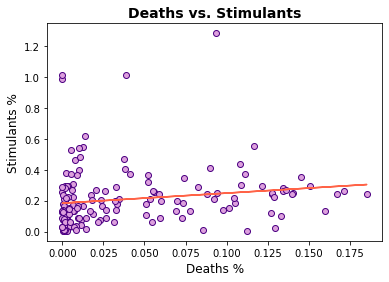

In [31]:
#Creating a Scatter plot for comparing Covid Deaths and Countries' 	Stimulants % Consumption
x = categories_clean["Deaths"]
y = categories_clean["Stimulants"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)

# Save the figure
plt.savefig("Saved Graphs\Scat_Dea_Vs_Stimulants.png")
plt.show()

The correlation between Confirmed Cases and diet composition of Stimulants is 0.25.


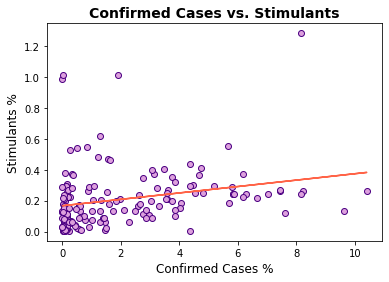

In [32]:
#Creating a Scatter plot for comparing Covid Confirmed Cases and Countries' 	Stimulants % Consumption
x = categories_clean["Confirmed Cases"]
y = categories_clean["Stimulants"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)

# Save the figure
plt.savefig("Saved Graphs\Scat_Con_Vs_Stimulants.png")
plt.show()

The correlation between Deaths and diet composition of Vegetable Oils is -0.04.


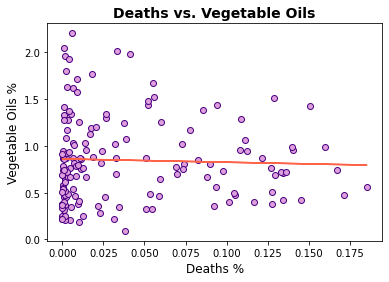

In [33]:
#Creating a Scatter plot for comparing Covid Deaths and Countries' 	Vegetable Oils % Consumption
x = categories_clean["Deaths"]
y = categories_clean["Vegetable Oils"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)

# Save the figure
plt.savefig("Saved Graphs\Scat_Dea_Vs_V-Oils.png")
plt.show()

The correlation between Confirmed Cases and diet composition of Vegetable Oils is -0.03.


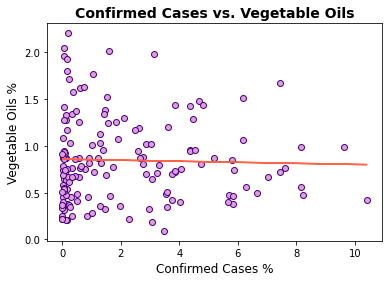

In [34]:
#Creating a Scatter plot for comparing Covid Confirmed Cases and Countries' 	Vegetable Oils % Consumption
x = categories_clean["Confirmed Cases"]
y = categories_clean["Vegetable Oils"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)

# Save the figure
plt.savefig("Saved Graphs\Scat_Con_Vs_V-Oils.png")
plt.show()

The correlation between Deaths and diet composition of Vegetables is -0.23.


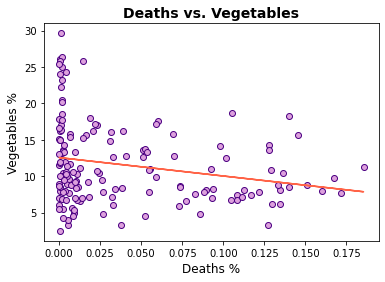

In [35]:
#Creating a Scatter plot for comparing Covid Deaths and Countries' 	Vegetables % Consumption
x = categories_clean["Deaths"]
y = categories_clean["Vegetables"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)

# Save the figure
plt.savefig("Saved Graphs\Scat_Dea_Vs_Vegetables.png")
plt.show()

The correlation between Confirmed Cases and diet composition of Vegetables is -0.25.


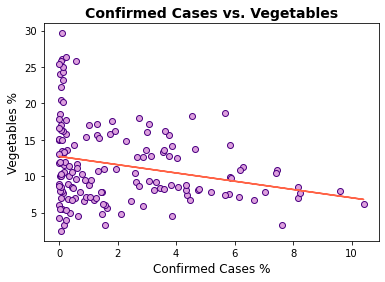

In [36]:
#Creating a Scatter plot for comparing Covid Confirmed Cases and Countries' Vegetables % Consumption
x = categories_clean["Confirmed Cases"]
y = categories_clean["Vegetables"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)

# Save the figure
plt.savefig("Saved Graphs\Scat_Con_Vs_Vegetables.png")
plt.show()

The correlation between Deaths and diet composition of Sugars is 0.15.


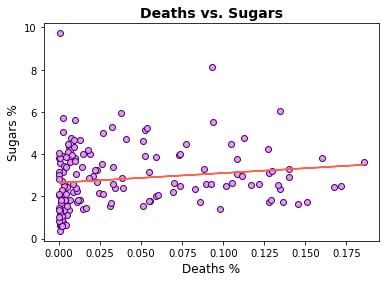

In [37]:
#Creating a Scatter plot for comparing Covid Deaths and Countries' 	Sugars % Consumption
x = categories_clean["Deaths"]
y = categories_clean["Sugars"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)

# Save the figure
plt.savefig("Saved Graphs\Scat_Dea_Vs_Sugars.png")
plt.show()

The correlation between Confirmed Cases and diet composition of Sugars is 0.25.


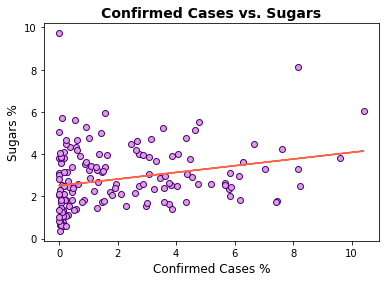

In [38]:
#Creating a Scatter plot for comparing Covid Confirmed Cases and Countries' 	Sugars % Consumption
x = categories_clean["Confirmed Cases"]
y = categories_clean["Sugars"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)

# Save the figure
plt.savefig("Saved Graphs\Scat_Con_Vs_Sugars.png")
plt.show()

The correlation between Deaths and diet composition of Aquatic Seafood is -0.21.


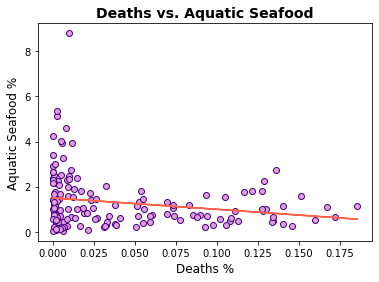

In [39]:
#Creating a Scatter plot for comparing Covid Deaths and Countries' 	Aquatic Seafood % Consumption
x = categories_clean["Deaths"]
y = categories_clean["Aquatic Seafood"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)

# Save the figure
plt.savefig("Saved Graphs\Scat_Dea_Vs_Aqua-Seafood.png")
plt.show()

The correlation between Confirmed Cases and diet composition of Aquatic Seafood is -0.12.


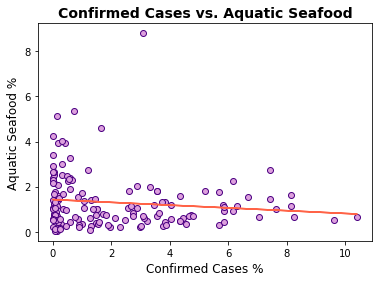

In [40]:
#Creating a Scatter plot for comparing Covid Confirmed Cases and Countries' 	Aquatic Seafood % Consumption
x = categories_clean["Confirmed Cases"]
y = categories_clean["Aquatic Seafood"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)

# Save the figure
plt.savefig("Saved Graphs\Scat_Con_Vs_Aqua-Seafood.png")
plt.show()

The correlation between Deaths and diet composition of Other is -0.37.


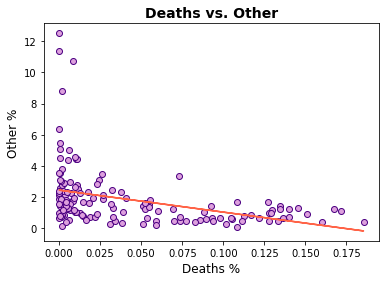

In [41]:
#Creating a Scatter plot for comparing Covid Deaths and Countries' 	Other % Consumption
x = categories_clean["Deaths"]
y = categories_clean["Other"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)

# Save the figure
plt.savefig("Saved Graphs\Scat_Dea_Vs_Other.png")
plt.show()

The correlation between Confirmed Cases and diet composition of Other is -0.34.


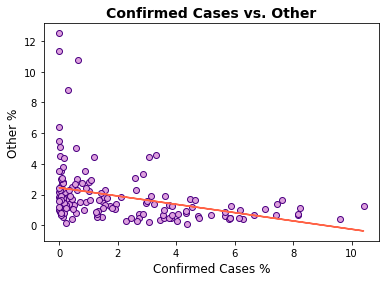

In [42]:
#Creating a Scatter plot for comparing Covid Deaths and Countries' 	Other % Consumption
x = categories_clean["Confirmed Cases"]
y = categories_clean["Other"]

print(f'The correlation between {x.name} and diet composition of {y.name} is {round(st.pearsonr(x, y) [0],2)}.')

new_plot_1 = scatter_plot(x, y)

# Save the figure
plt.savefig("Saved Graphs\Scat_Dea_Vs_Other.png")
plt.show()

# The Section will be for the Bar Graphs

In [43]:
#Set Country as the index
categories_clean = categories_clean.set_index('Country')

In [44]:
#First we will create a data frame with the countries we will be comparing 

#Create the date frame with the 5 countries we will be using and reset the index. We will display the new dataframe
bar_countries = categories_clean.loc[("United States of America", "Belgium", "Slovenia", "United Republic of Tanzania", "Vietnam"),:]
bar_countries


,Alcoholic Beverages,Animal fats,Cereals - Excluding Beer,Fruits,Milk,Stimulants,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed Cases,Deaths,Recovered,Active,Population,Sugars,Aquatic Seafood,Meats & Animal Products,Other
Country,,,,,,,,,,,,,,,,,,,,
United States of America,4.8647,0.1681,5.5048,4.5432,12.8657,0.2458,0.9889,8.5639,28.7587,37.3,<2.5,8.159922,0.140103,0.000000,8.019819,329878000.0,3.3200,1.1307,28.3054,0.7401
Belgium,5.3730,0.8559,6.6704,4.1623,11.6344,0.2461,0.5640,11.2318,32.2637,24.5,<2.5,6.286322,0.185428,0.000000,6.100894,11515000.0,3.6514,1.1335,21.8321,0.3815
Slovenia,4.9933,1.1248,7.6345,6.4367,12.2569,0.2615,0.4739,7.6857,31.0774,22.5,<2.5,8.235901,0.171755,7.312934,0.751213,2103000.0,2.4915,0.6520,23.8061,1.1057
United Republic of Tanzania,4.5185,0.0403,10.4453,6.8147,3.3606,0.0300,0.9136,17.8890,45.1973,7.1,30.7,0.000852,0.000035,0.000306,0.000511,59734000.0,1.0345,0.5828,5.6224,3.5508
Vietnam,1.4591,0.1640,16.8740,5.9029,0.6069,0.2880,0.2201,13.0104,41.4232,2.1,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0,2.0996,2.6434,13.7373,1.5712


In [45]:
#Reset the index so we can use it
bar_countries = bar_countries.reset_index()

In [46]:
#Used a function to help wrap labels in the bar graph
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

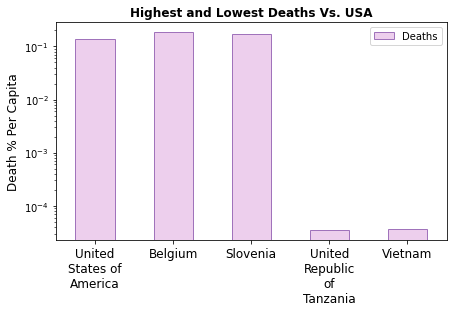

In [47]:
# Create the bar graph and save a png for us to use comparing death rates between 2 highest countries, 2 lowest countries, and the US>
bg = bar_countries.plot.bar(x= 'Country', y = 'Deaths', color='plum', alpha=0.5, edgecolor="indigo", align="center", figsize=(7,4), xlabel = "", logy = True) 
plt.title('Highest and Lowest Deaths Vs. USA', weight = 'bold')
plt.ylabel('Death % Per Capita', fontsize = 12)
bg.set_xticklabels(bar_countries["Country"], verticalalignment = 'top', rotation=0, fontsize = 12)
wrap_labels(bg, 10)

bg
plt.savefig("Saved Graphs\Bar_Gra_Cou_Vs_Dea.png", bbox_inches = "tight")

# This section is the Pie Graphs

In [48]:
#Going to create a dataframe with only columns of the food categories so dropping any columns we are not using and display it
food_categories_df = categories_clean.loc[:, categories_clean.columns.drop(['Obesity', 'Undernourished', 'Confirmed Cases', 'Deaths','Recovered', 'Active', 'Population'])]
food_categories_df.head()

,Alcoholic Beverages,Animal fats,Cereals - Excluding Beer,Fruits,Milk,Stimulants,Vegetable Oils,Vegetables,Vegetal Products,Sugars,Aquatic Seafood,Meats & Animal Products,Other
Country,,,,,,,,,,,,,
Afghanistan,0.0014,0.1973,24.8097,5.3495,7.5828,0.3078,0.5345,7.6444,40.5645,1.3489,0.0350,11.0517,0.5725
Albania,1.6719,0.1357,5.7817,6.7861,15.7213,0.1055,0.3261,13.5849,31.2304,1.5367,0.2126,21.4668,1.4403
Algeria,0.2711,0.0282,13.6816,6.3801,7.6189,0.2216,1.0310,15.7824,40.3651,1.8342,0.2416,11.3786,1.1656
Angola,5.8087,0.0560,9.1085,6.0005,0.8311,0.0508,0.6463,20.4143,45.0722,1.8495,1.7707,7.1986,1.1928
Argentina,4.2672,0.2234,8.4102,6.0435,10.2328,0.4378,0.9541,7.3923,30.6559,3.0536,0.4693,27.7633,0.0966


In [49]:
# Created a list that contains all of the categories we will be using in the pie chart and display it
food_cat_lis = list(food_categories_df.columns.values)
del food_cat_lis[0]
food_cat_lis

['Animal fats',
 'Cereals - Excluding Beer',
 'Fruits',
 'Milk',
 'Stimulants',
 'Vegetable Oils',
 'Vegetables',
 'Vegetal Products',
 'Sugars',
 'Aquatic Seafood',
 'Meats & Animal Products',
 'Other']

In [50]:
# Going create a function to create the Pie Graphs
def pie_graph(sizes, categories, title):    

    plt.pie(sizes, shadow=True, radius = 2.5) 
    labels = [f'{l}, {s:0.1f}%' for l, s in zip(categories, sizes)]
    plt.title(title, pad=150, fontsize = 25) 
  
    plt.legend(title= 'Food Categories', title_fontsize = 20, labels = labels, loc = 'center left',prop={'size': 15}, bbox_to_anchor=(-2.5, 0, 0.5, 1))
    plt.savefig(f"Saved Graphs\Pie_{title}.png", bbox_inches = 'tight')
    plt.show()
    

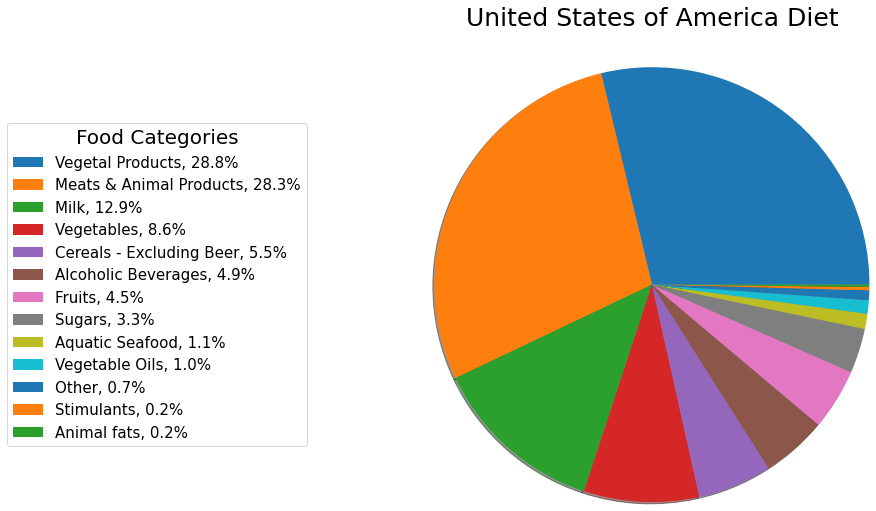

In [51]:
#Creating Pie Chart for United State of America Diet
country = food_categories_df.loc["United States of America",:]
country.sort_values(inplace= True, ascending = False)
pie_graph(country.values, country.index, "United States of America Diet")


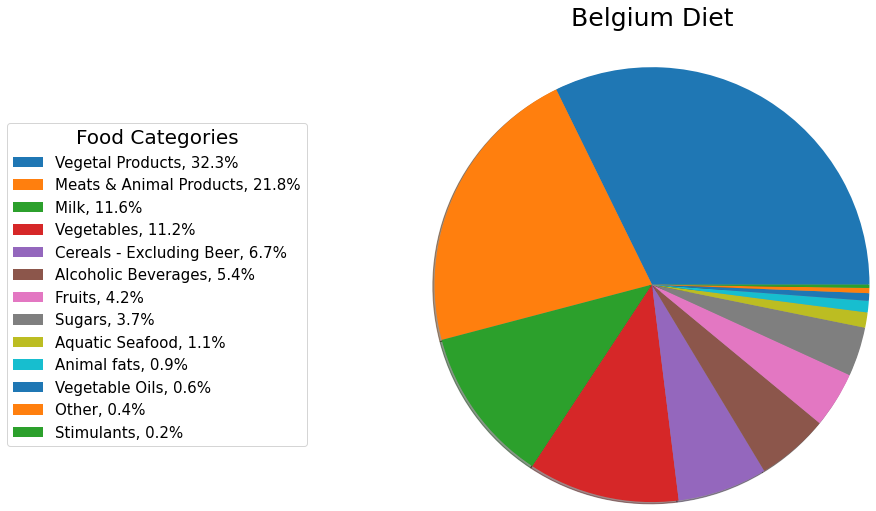

<Figure size 432x288 with 0 Axes>

In [52]:
#Creating Pie Chart for Belgium Diet
country = food_categories_df.loc["Belgium",:]
country.sort_values(inplace= True, ascending = False)
pie_graph(country.values, country.index, "Belgium Diet")
plt.savefig(f"Saved Graphs\Pie_Bel.png")

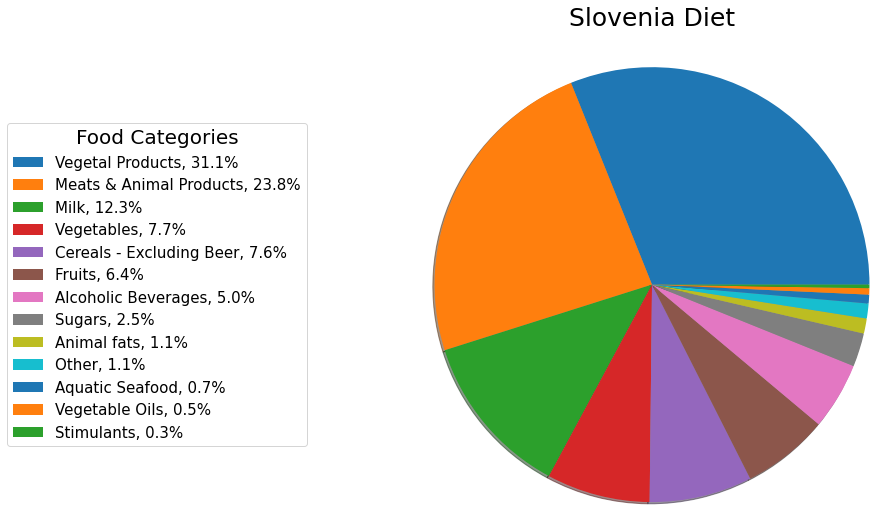

<Figure size 432x288 with 0 Axes>

In [53]:
#Creating Pie Chart for Slovenia Diet
country = food_categories_df.loc["Slovenia",:]
country.sort_values(inplace= True, ascending = False)
pie_graph(country.values, country.index, "Slovenia Diet")
plt.savefig(f"Saved Graphs\Pie_Slovenia.png")

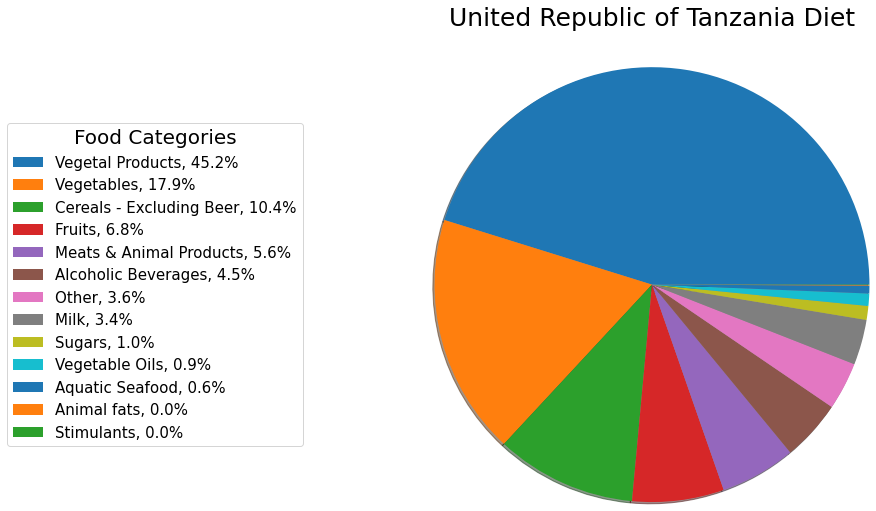

<Figure size 432x288 with 0 Axes>

In [54]:
#Creating Pie Chart for United Republic of Tanzania Diet
country = food_categories_df.loc["United Republic of Tanzania",:]
country.sort_values(inplace= True, ascending = False)
pie_graph(country.values, country.index, "United Republic of Tanzania Diet")
plt.savefig(f"Saved Graphs\Pie_URT.png")

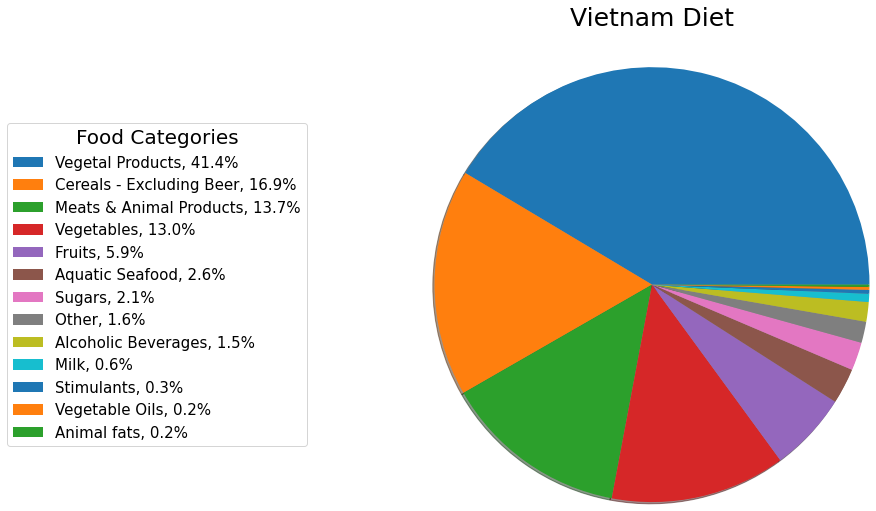

<Figure size 432x288 with 0 Axes>

In [55]:
#Creating Pie Chart for Vietnam Diet
country = food_categories_df.loc["Vietnam",:]
country.sort_values(inplace= True, ascending = False)
pie_graph(country.values, country.index, "Vietnam Diet")
plt.savefig(f"Saved Graphs\Pie_Vietnam.png")